In [1]:
%load_ext autoreload
%autoreload 2

## Parameters

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from time import time
from Utils.io_utils import load_magnetic_field_para
from Stability.stability import stability_experiment
from sklearn.preprocessing import StandardScaler
from Similarity.similarity import plot_similarity
from tqdm import tqdm
from numba import njit
import random


figure_path = 'fig'
d = 12
pattern_dict= ["Liquid", "Network", "Ribbon", "Flocculence", "Vortex", "Rod"]
seed = 12
np.random.seed(seed)
random.seed(seed)


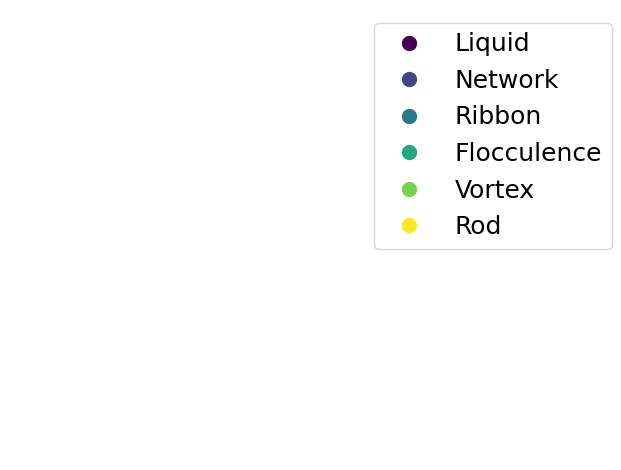

In [3]:
import matplotlib.pyplot as plt
import numpy as np
pattern_dict = ["Liquid", "Network", "Ribbon", "Flocculence", "Vortex", "Rod"]
fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(pattern_dict)))
for i, pattern in enumerate(pattern_dict):
    ax.plot([], [], 'o', label=pattern, color=colors[i], markersize=10)
legend = ax.legend(fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.axis('off')
plt.tight_layout()
plt.show()

## Loading Data

In [4]:
X_train_pre, X_test_pre, y_train_pre, y_test_pre, X_1, y = load_magnetic_field_para()

In [5]:
X_1

array([   27,   177,   404,   518,  1314,  1557,  1760,  1772,  2193,
        2477,  2851,  3025,  3038,  3272,  4175,  4656,  4739,  5051,
        6448,  7131,  7145,  7219,  7320,  7425,  7531,  7557,  7971,
        8070,  8327,  9061,  9241,  9382,  9916, 11451, 11992, 12198,
       13365, 13397, 13851, 13886, 13966, 14268, 14305, 15243, 15975,
       16025, 16031, 16292, 16688, 16737, 17315, 17690, 17829, 18109,
       18390, 18645, 18831, 19152, 19609, 19623, 19671, 19696, 19921,
       20091, 20108, 20131, 22343, 22902, 23009, 23320, 23438, 23484,
       23542, 23643, 24961, 25168, 25394, 26324, 26339, 26899, 26953,
       27293, 27306, 27389, 27789, 28103, 28141, 29042, 29223, 29230,
       29813, 29947, 29968, 30238, 30347, 30819, 30986, 31039, 31244,
       31283, 31312, 31677, 32024, 32390, 32470, 32793, 32798, 32876,
       33090, 33124, 33710, 33754, 33909, 34305, 34730, 35569, 35809,
       38846, 40409, 40600, 40788, 40902, 41046, 42324, 42709, 43295,
       44398, 44595,

## Normalization

In [6]:
print(X_train_pre[:5, ])
X_pre_normalized = StandardScaler().fit_transform(X_train_pre)
print(X_pre_normalized[:5,])

[[5. 5. 5. 8. 4. 2. 3. 1.]
 [3. 5. 3. 6. 0. 2. 0. 3.]
 [3. 7. 5. 6. 0. 4. 2. 3.]
 [5. 5. 7. 0. 2. 2. 1. 3.]
 [7. 3. 5. 4. 0. 4. 3. 2.]]
[[ 0.164696   -0.14436826  0.0507804   1.30164757 -0.05564149 -0.67652911
   1.27678143 -0.44584974]
 [-1.15287203 -0.14436826 -1.16794915  0.60120942 -1.39103721 -0.67652911
  -1.30547315  1.30831316]
 [-1.15287203  1.09307398  0.0507804   0.60120942 -1.39103721  0.02941431
   0.4160299   1.30831316]
 [ 0.164696   -0.14436826  1.26950994 -1.50010505 -0.72333935 -0.67652911
  -0.44472162  1.30831316]
 [ 1.48226404 -1.3818105   0.0507804  -0.09922874 -1.39103721  0.02941431
   1.27678143  0.43123171]]


## Stability

[4.273956760483242, 3.1808399908590035, 2.9752058935976105, 1.6460774691342002, 3.0220249338739467, 3.9066478028176674] [1.9076922332388468, 1.538465818175949, 1.6210835832512651, 1.0785136376342377, 1.8765429298598673, 1.8907518976724773] [2.1475284393985556, 1.9053849519708412, 1.8754279687398359, 1.7062087984640826, 1.7985910042294675, 2.018672130327215] [0.30219988807992804, 0.32983250999575614, 0.3484977582439013, 0.3040124799245991, 0.35893893620903805, 0.4076171231445106] [0.6688888888888889, 0.5484126984126985, 0.5143333333333334, 0.27619047619047615, 0.5833333333333334, 0.6631720430107527] [0.31867007591543733, 0.22579441794162086, 0.2553811965583127, 0.11086139739831254, 0.2650122289281789, 0.2650807528408098]


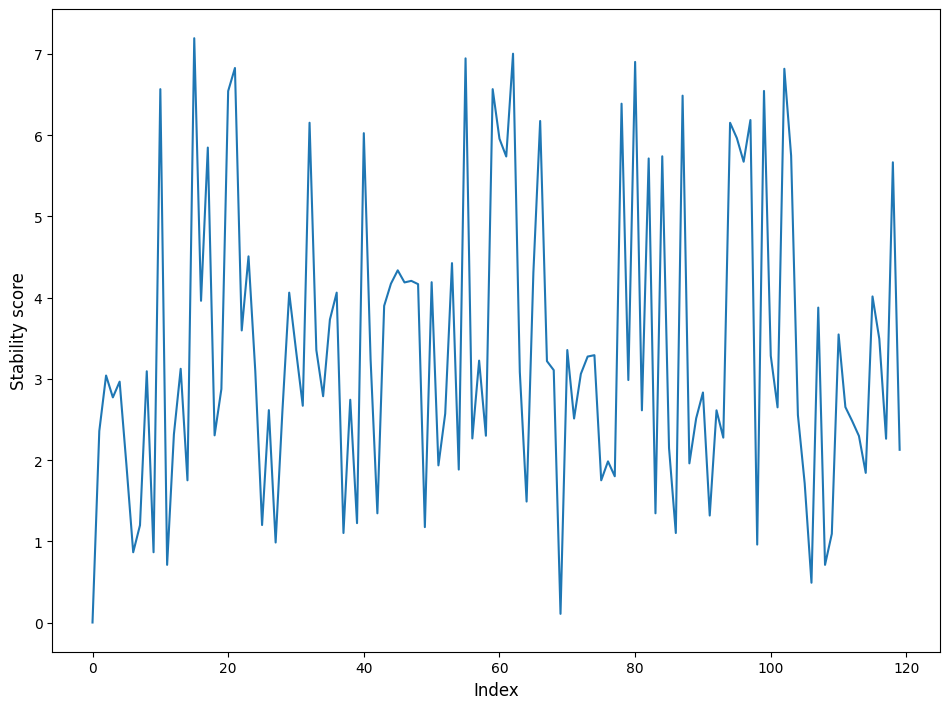

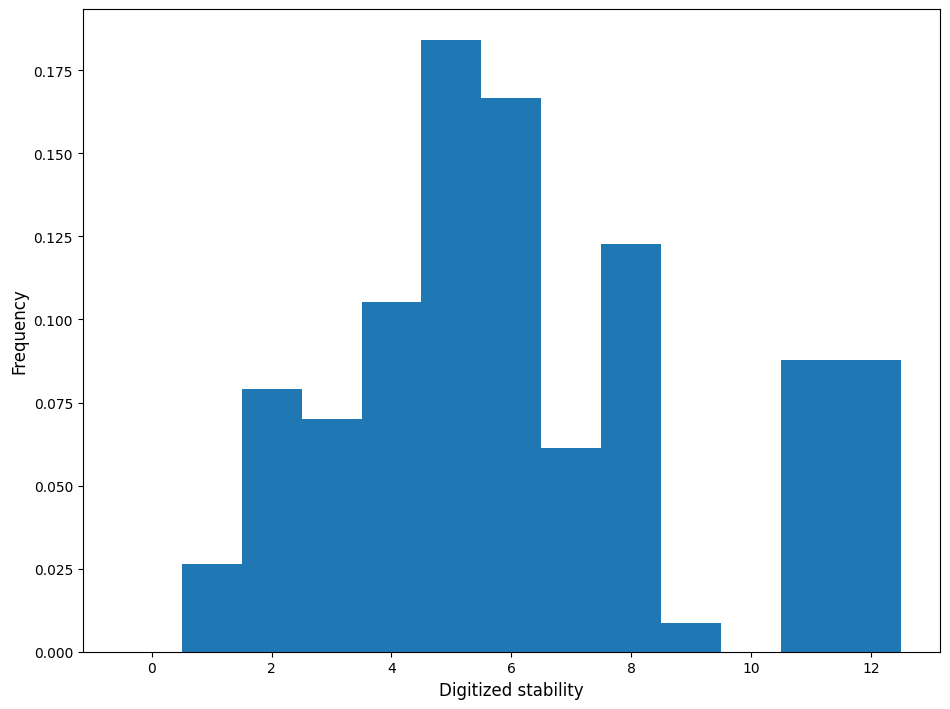

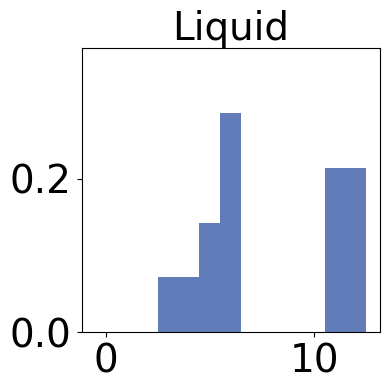

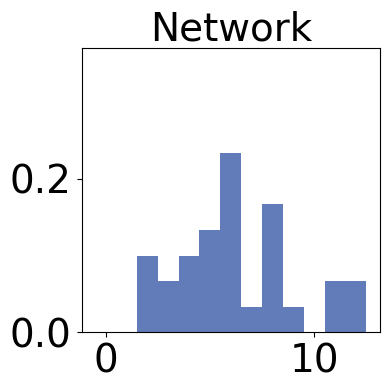

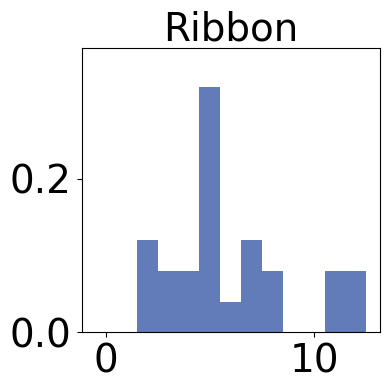

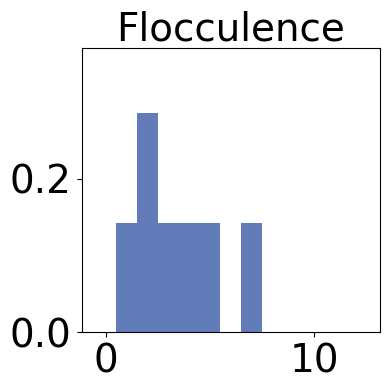

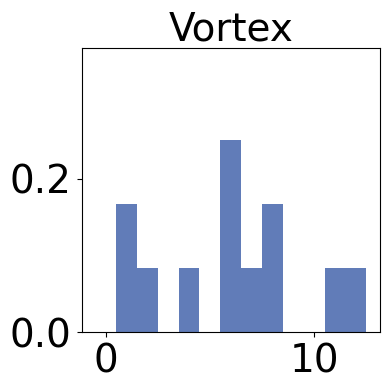

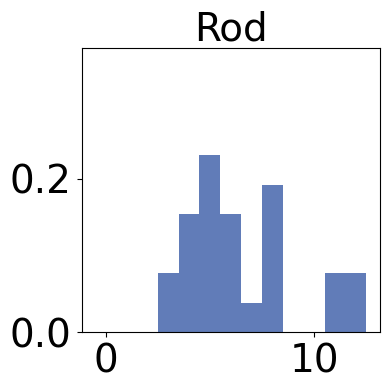

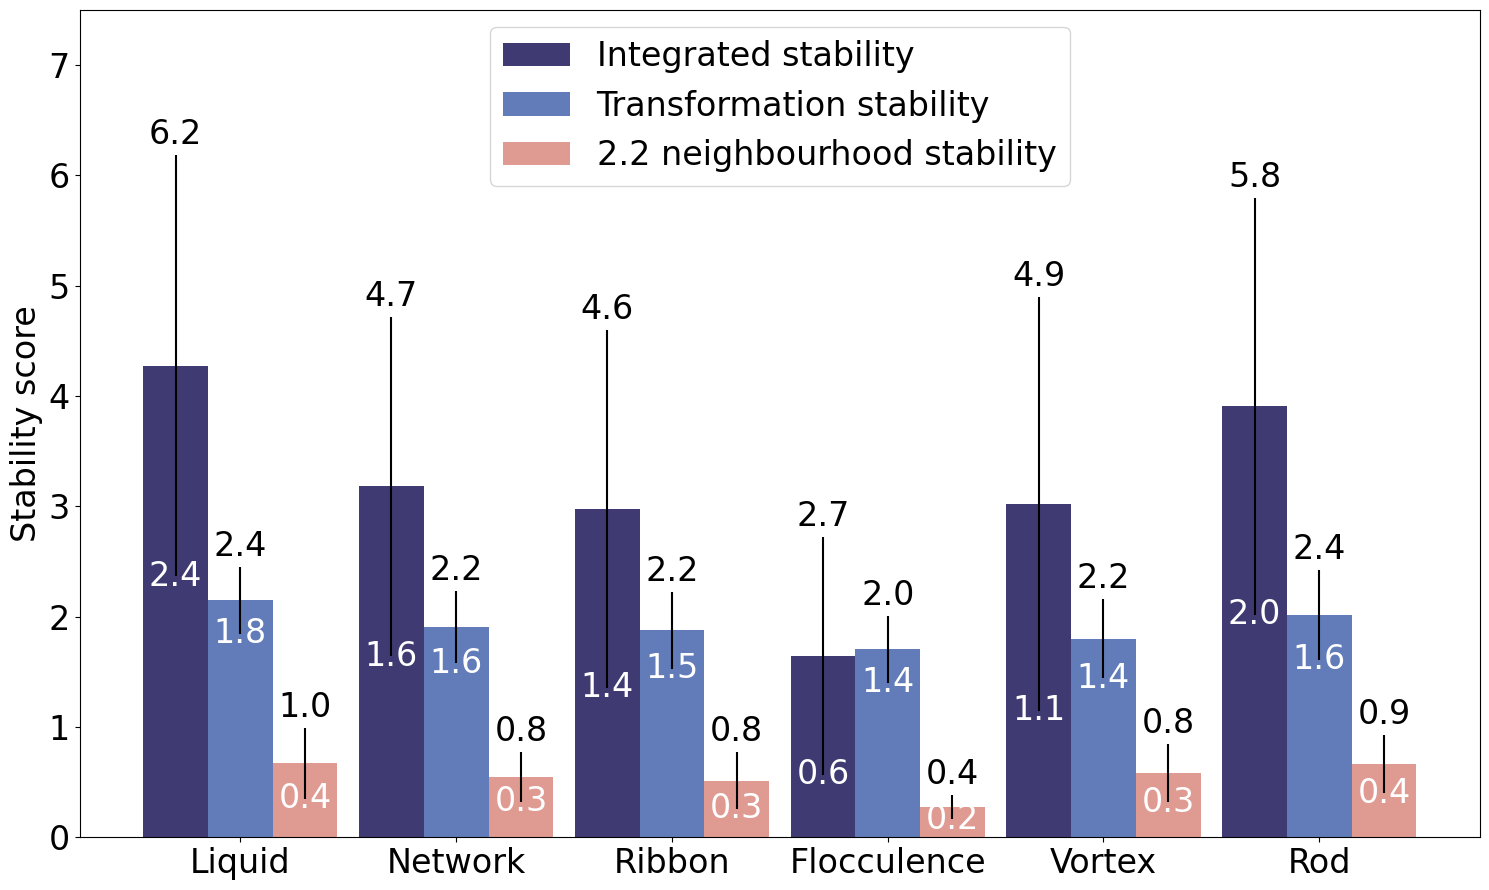

In [7]:
_lambda = 1
neighbourSize = 2.2
stability_experiment(X_pre_normalized, y_train_pre, _lambda, neighbourSize, True)
# stability_experiment(X_pre_normalized, y_train_pre, _lambda, 2.3, True)
# stability_experiment(X_pre_normalized, y_train_pre, _lambda, 2.2, True)
# stability_experiment(X_pre_normalized, y_train_pre, _lambda, 2.1, True)
# stability_experiment(X_pre_normalized, y_train_pre, _lambda, 2.0, True)

# Data augmentation

In [8]:
from Feature.feature import data_augmentation, feature, radial

In [9]:
X_train_raw = feature(X_train_pre)

In [37]:
X_train, y_train = feature(X_train_pre), y_train_pre
X_test, y_test = feature(X_test_pre), y_test_pre

In [39]:
X_test

array([[5.00e+00, 3.00e+00, 3.00e+00, 0.00e+00, 2.00e+00, 2.00e+00,
        3.00e+00, 1.00e+00, 5.03e-01, 4.80e-01, 2.74e-01, 2.00e+00,
        1.89e+01, 1.06e-01],
       [3.00e+00, 7.00e+00, 5.00e+00, 0.00e+00, 6.00e+00, 8.00e+00,
        0.00e+00, 1.00e+00, 5.28e-01, 5.28e-01, 5.04e-01, 7.07e+00,
        3.70e+01, 1.91e-01],
       [7.00e+00, 7.00e+00, 7.00e+00, 4.00e+00, 8.00e+00, 8.00e+00,
        3.00e+00, 2.00e+00, 9.10e-01, 2.75e-01, 3.65e-01, 8.49e+00,
        4.48e+01, 1.90e-01],
       [5.00e+00, 5.00e+00, 5.00e+00, 6.00e+00, 4.00e+00, 2.00e+00,
        3.00e+00, 1.00e+00, 9.11e-01, 3.64e-01, 2.74e-01, 5.29e+00,
        3.17e+01, 1.67e-01],
       [5.00e+00, 3.00e+00, 3.00e+00, 8.00e+00, 0.00e+00, 8.00e+00,
        1.00e+00, 3.00e+00, 4.80e-01, 5.03e-01, 2.74e-01, 8.00e+00,
        2.61e+01, 3.06e-01],
       [3.00e+00, 5.00e+00, 5.00e+00, 0.00e+00, 8.00e+00, 0.00e+00,
        1.00e+00, 3.00e+00, 5.28e-01, 5.15e-01, 2.74e-01, 5.66e+00,
        3.14e+01, 1.80e-01],
       [3.

# Explainable Learning

In [11]:
index = np.arange(len(X_train_raw))

In [12]:
column = ["fx","fy","fz","Bx","By","Bz","phi_y-phi_x","phi_z-phi_x",'x_y_radial','x_z_radial','y_z_radial', 'Brms', 'LTAV', 'Brms/LTAV']

In [13]:
import pandas as pd
X_train_raw = pd.DataFrame(data=X_train_raw, index=index, columns=column)

(120, 14, 6)


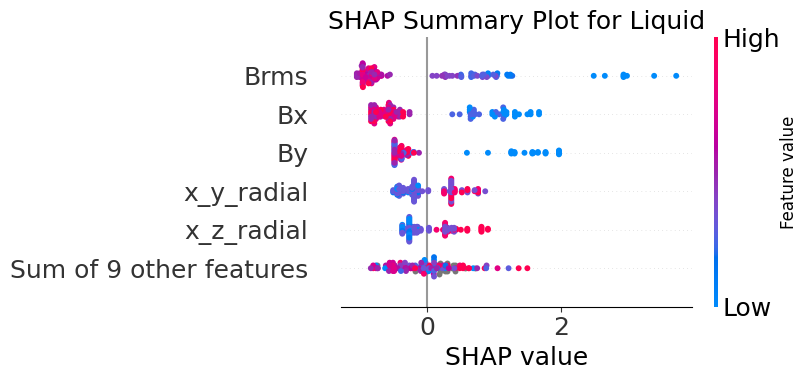

(120, 14, 6)


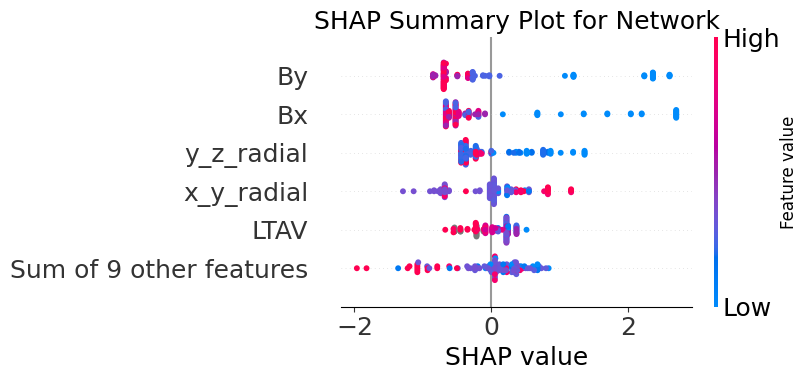

(120, 14, 6)


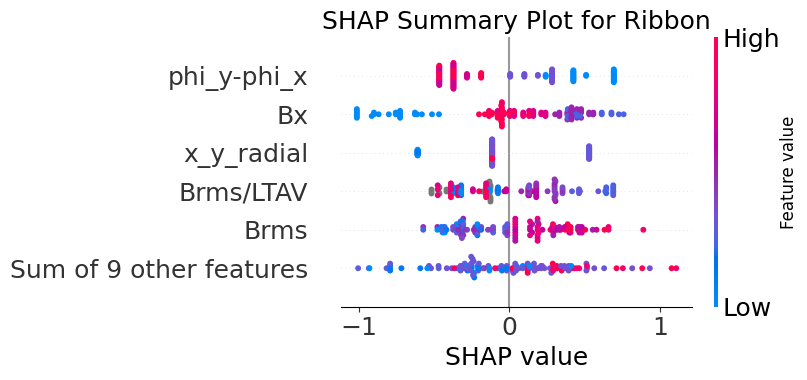

(120, 14, 6)


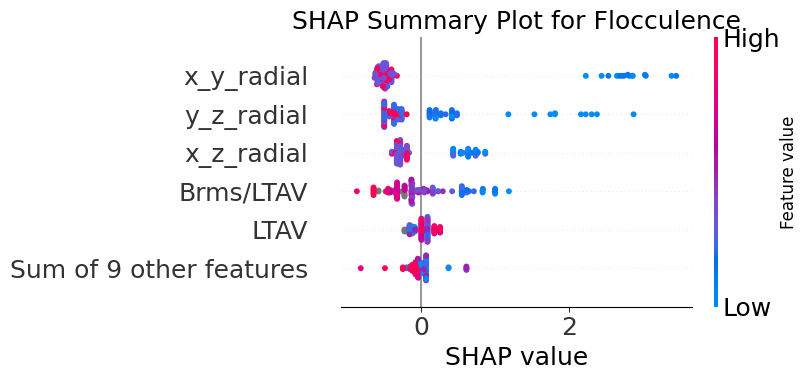

(120, 14, 6)


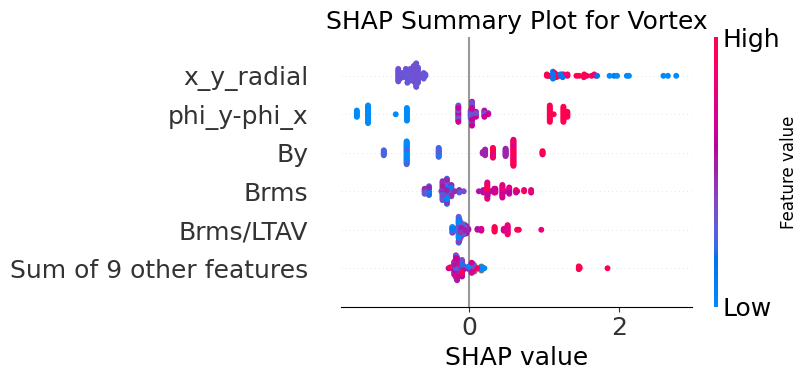

(120, 14, 6)


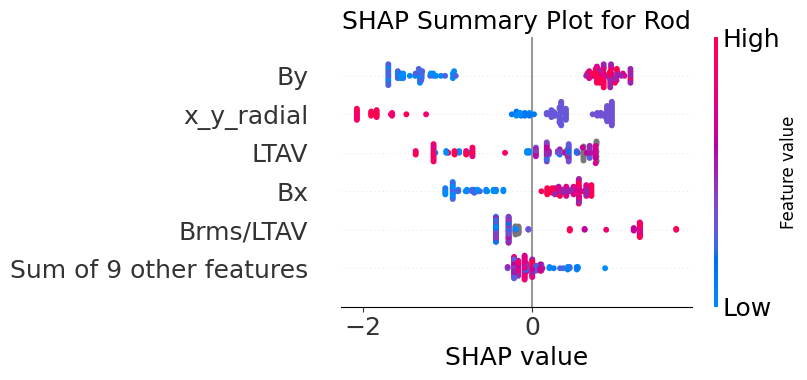

In [14]:
import xgboost as xgb
import shap
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure pattern_dict and figure_path are defined
pattern_dict= ["Liquid", "Network", "Ribbon", "Flocculence", "Vortex", "Rod"]
figure_path = './fig'  

def ShapAnalysis(X_train_pre, y_train_pre, i):
    params = {
        'eval_metric': 'auc',
        'n_estimators': 10,
        'max_depth': 2,
        'learning_rate': 1,
        'seed': 1234,
        'objective': 'binary:logistic'
    }
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train_pre, y_train_pre)
    explainer = shap.Explainer(xgb_model, X_train_pre)
    shap_values = explainer(X_train_pre)
    print(shap_values.shape)
    fsz=18
    # SHAP summary plot for top features
    X_train_pre = np.array(X_train_pre)
    fig, ax = plt.subplots()
    shap.plots.beeswarm(shap_values[:, :, i], show=False, max_display=6, s=fsz) 
    plt.xlabel('SHAP value', fontsize=fsz)
    plt.title('SHAP Summary Plot for ' + pattern_dict[i], fontsize=fsz)
    ax.tick_params(axis='both', which='major', labelsize=fsz)
    cbar = plt.gcf().axes[-1]  # Get the colorbar axis
    cbar.tick_params(labelsize=fsz)  # Adjust the fontsize as needed
    plt.tight_layout()
    plt.savefig(figure_path + "/Shap_Analysis_on_pattern_{}.png".format(pattern_dict[i]))
    plt.show()

for i in range(6):
    ShapAnalysis(X_train_raw, y_train_pre, i)

plt.show()

# Oversampling and Visualization

In [18]:
from imblearn.over_sampling import SMOTE
X_train_pre_1 = X_train_pre.copy()
y_train_pre_1 = y_train_pre.copy()
sampler = SMOTE()
X_train_pre, y_train_pre = sampler.fit_resample(X_train_pre, y_train_pre)

In [19]:
X_train, y_train = feature(X_train_pre), y_train_pre

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8, whiten=True).fit(X_train_pre)
X_pca_train_pre = pca.transform(X_train_pre)
pca2 = PCA(n_components=14, whiten=True).fit(X_train)
X_pca_train = pca2.transform(X_train)

In [21]:
from Utils.visualize import plot_2d_visualization


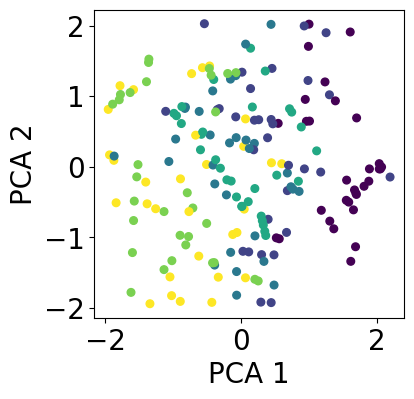

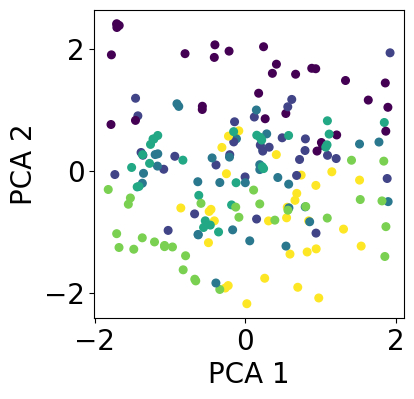

In [22]:
from Utils.visualize import plot_2d_visualization
plot_2d_visualization(X_pca_train_pre, y_train_pre, "PCA",datatype="raw", s=30)
plot_2d_visualization(X_pca_train, y_train, "PCA", s=30)

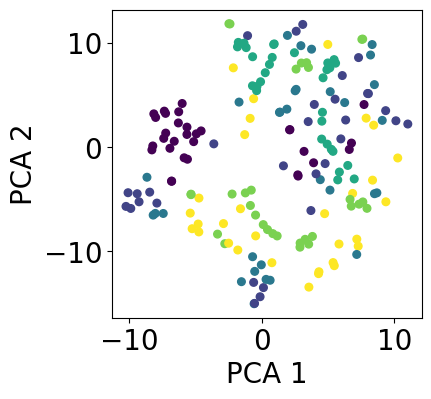

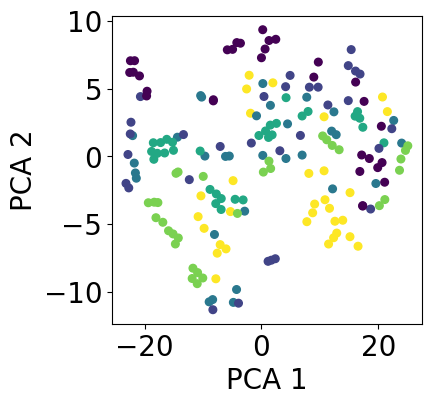

In [23]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, learning_rate=100, perplexity=30, init='pca', random_state=33).fit_transform(X_train_pre)
plot_2d_visualization(X_tsne, y_train_pre, "tSNE", datatype="raw", s=30)

X_tsne2 = TSNE(n_components=2, learning_rate=10, perplexity=20, init='pca', random_state=33).fit_transform(X_train)
plot_2d_visualization(X_tsne2, y_train, "tSNE", s=30)

# Clustering

In [24]:
X_train_norm = StandardScaler().fit_transform(X_train)
X_train_pre_1_norm = StandardScaler().fit_transform(X_train_pre_1)
X_train_pre_norm = StandardScaler().fit_transform(X_train_pre)

0.043011080459069366


<Figure size 640x480 with 0 Axes>

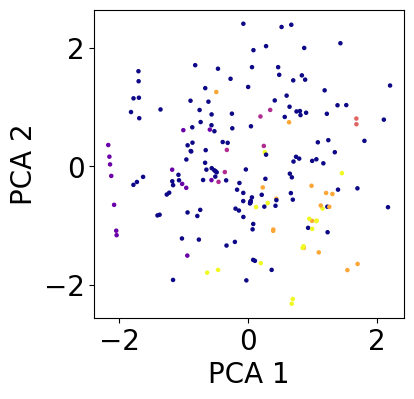

In [25]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics

def clustering(X, y, n_classes, datatype = "raw",):
    clusters = SpectralClustering(n_clusters = n_classes, assign_labels='discretize',random_state=0).fit(X)
    X_pca = PCA(n_components=2, whiten=True).fit_transform(X)
    plt.plasma()
    plot_2d_visualization(X_pca, clusters.labels_, 'Spectral Clustering-PCA', datatype=datatype, s=5)
    return clusters

clusters = clustering(X_train_pre_norm, y_train_pre, 6)
clustering_score = metrics.adjusted_rand_score(clusters.labels_, y_train_pre)
print(clustering_score)

In [26]:
from itertools import permutations

def match_labels(ground_truth_labels, clustering_labels):

    num_clusters = len(set(clustering_labels))
    num_ground_truth = len(set(ground_truth_labels))

    best_score = -1
    best_permutation = None

    # Generate all possible permutations of cluster labels
    for perm in permutations(range(num_clusters)):
        permuted_labels = np.array([perm[label] for label in clustering_labels])

        # Calculate agreement score between ground truth and permuted clustering labels
        score = np.sum(ground_truth_labels == permuted_labels)

        # Update best permutation if the current permutation has higher score
        if score > best_score:
            best_score = score
            best_permutation = permuted_labels

    return best_permutation

matched_labels = match_labels(y_train_pre, clusters.labels_)
print("Matched labels:", matched_labels)


Matched labels: [3 3 3 1 3 1 2 3 3 2 0 3 1 3 3 3 3 3 3 3 2 3 3 1 4 3 3 3 0 3 0 3 3 3 3 3 3
 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 0 1 3 3 3 3 3 3 0 3 3 3 3 3 2
 3 3 3 3 3 3 0 3 3 3 5 3 3 3 3 4 3 4 1 3 3 0 3 1 3 0 3 3 3 3 1 4 3 4 3 1 2
 1 3 4 3 3 4 3 3 3 3 3 1 5 0 0 0 3 0 0 0 0 1 1 1 0 3 3 2 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 4 3 3 3 3 3 3 4 3 4 3 3
 4]


In [27]:
# cm = confusion_matrix(y_train_pre, matched_labels)
# np.set_printoptions(precision=2)
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# print(cm)
# plot_confusion_matrix(cm_normalized, pattern_dict)

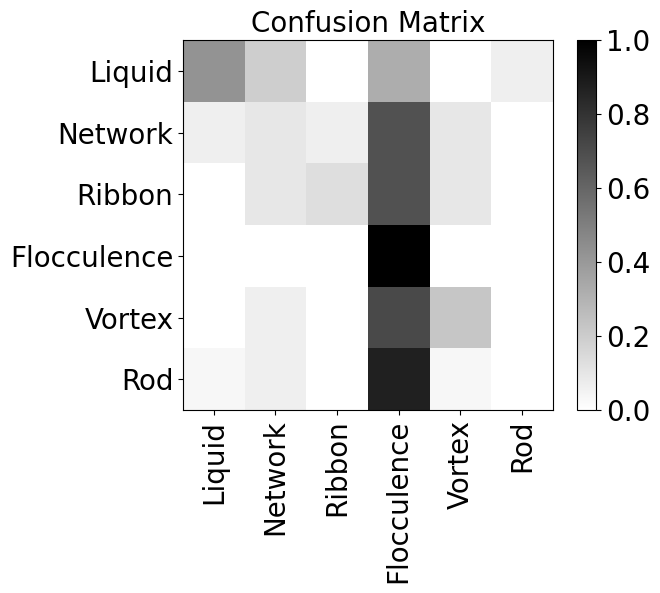

In [28]:
from Utils.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(y_train_pre, matched_labels, pattern_dict)

In [29]:
clusters.labels_, y_train_pre

(array([0, 0, 0, 4, 0, 4, 2, 0, 0, 2, 5, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 4, 1, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 5, 4, 0, 0, 0, 0, 0,
        0, 5, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 3, 0, 0, 0,
        0, 1, 0, 1, 4, 0, 0, 5, 0, 4, 0, 5, 0, 0, 0, 0, 4, 1, 0, 1, 0, 4,
        2, 4, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 5, 5, 5, 0, 5, 5, 5, 5,
        4, 4, 4, 5, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1]),
 array([4, 2, 1, 0, 0, 5, 2, 0, 0, 1, 1, 3, 5, 4, 1, 5, 5, 5, 2, 1, 2, 5,
        2, 1, 1, 3, 5, 3, 1, 2, 5, 5, 0, 2, 5, 3, 5, 2, 0, 5, 5, 1, 5, 1,
        5, 1, 4, 1, 5, 2, 1, 1, 1, 5, 0, 5, 2, 4, 5, 0, 1, 0, 5, 1, 1, 2,
        4, 0, 1, 4, 1, 5, 5, 1, 4, 5, 2, 3, 2, 5, 0, 3, 1, 2, 0, 5, 1, 5,
        4, 2, 2, 1, 2, 1, 5, 0, 2, 1, 2, 0, 5, 5, 5, 4, 2, 1, 3, 4, 1, 4

0.043011080459069366


<Figure size 640x480 with 0 Axes>

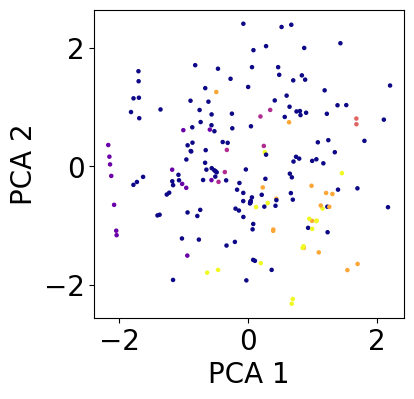

In [30]:
clusters = clustering(X_train_pre_1_norm, y_train_pre_1, 6, datatype = "augmented")
clustering_score_0 = metrics.adjusted_rand_score(clusters.labels_, y_train_pre_1)
print(clustering_score_0)

0.00659936649727685


<Figure size 640x480 with 0 Axes>

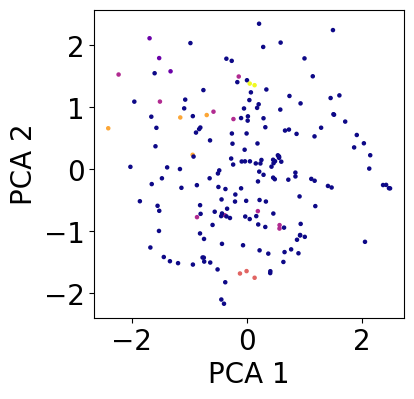

In [31]:
clusters2 = clustering(X_train_norm, y_train, 6)
clustering_score2 = metrics.adjusted_rand_score(clusters2.labels_, y_train)
print(clustering_score2)

# Computer vision analysis

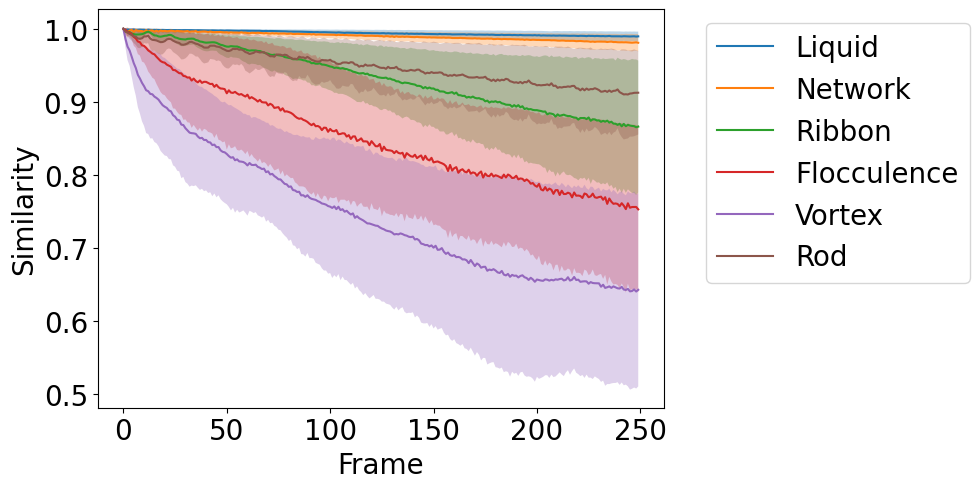

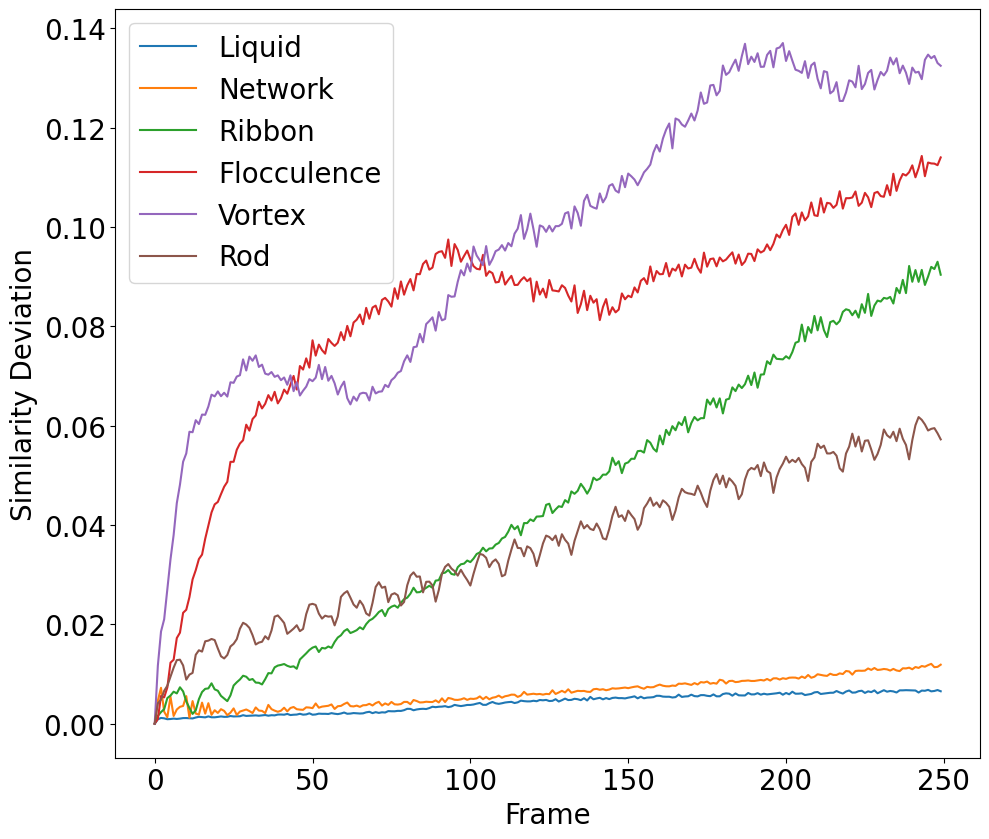

In [32]:
count = [0,0,0,0,0,0]
length = 250
mean = np.zeros((6, length)) 
std_value  = np.zeros((6, length)) 
fsz = 20 
import json
tf = open("./Data/myDictionary.json", "r")
similarity_dict = json.load(tf)
tf.close()
for index, x in enumerate(X_1):
    similarity_list = np.array(similarity_dict[str(x)][0:length])
    if similarity_list.shape[0] >= length and x != 2193:
        mean[y[index]] = (mean[y[index]]*int(count[y[index]]) + similarity_list)/int(count[y[index]]+1)
        count[y[index]] += 1
for index, x in enumerate(X_1):
    similarity_list = np.array(similarity_dict[str(x)][0:length])
    if similarity_list.shape[0] >= length and x != 2193:
        std_value[y[index]] += np.sqrt((similarity_list-mean[y[index]])*(similarity_list-mean[y[index]]))/count[y[index]]

plt.figure(figsize=(10, 5))
plt.plot(range(250), mean[0], label='Liquid')
plt.fill_between(range(250), mean[0]+std_value[0], mean[0]-std_value[0], alpha=0.3)
plt.plot(range(250), mean[1], label='Network')
plt.fill_between(range(250), mean[1]+std_value[1], mean[1]-std_value[1], alpha=0.3)
plt.plot(range(250), mean[2], label='Ribbon')
plt.fill_between(range(250), mean[2]+std_value[2], mean[2]-std_value[2], alpha=0.3)
plt.plot(range(250), mean[3], label='Flocculence')
plt.fill_between(range(250), mean[3]+std_value[3], mean[3]-std_value[3], alpha=0.3)
plt.plot(range(250), mean[4], label='Vortex')
plt.fill_between(range(250), mean[4]+std_value[4], mean[4]-std_value[4], alpha=0.3)
plt.plot(range(250), mean[5], label='Rod')
plt.fill_between(range(250), mean[5]+std_value[5], mean[5]-std_value[5], alpha=0.3)
plt.ylabel('Similarity', fontsize=fsz)
plt.xlabel('Frame', fontsize=fsz)
plt.legend(fontsize=fsz, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=fsz)
plt.yticks(fontsize=fsz)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8.5))
plt.plot(range(250), std_value[0], label='Liquid')
plt.plot(range(250), std_value[1], label='Network')
plt.plot(range(250), std_value[2], label='Ribbon')
plt.plot(range(250), std_value[3], label='Flocculence')
plt.plot(range(250), std_value[4], label='Vortex')
plt.plot(range(250), std_value[5], label='Rod')
plt.ylabel('Similarity Deviation', fontsize=fsz)
plt.xlabel('Frame', fontsize=fsz)
plt.legend(fontsize=fsz)
plt.xticks(fontsize=fsz)
plt.yticks(fontsize=fsz)
plt.tight_layout()

# SVC learning with different kernels

In [33]:
X_test[1]

array([ 3.  ,  7.  ,  5.  ,  0.  ,  6.  ,  8.  ,  0.  ,  1.  ,  0.53,
        0.53,  0.5 ,  7.07, 36.94,  0.19])

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.78      0.54      0.64        13
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       0.60      0.43      0.50         7

    accuracy                           0.55        31
   macro avg       0.45      0.51      0.46        31
weighted avg       0.61      0.55      0.55        31



/Users/mengchenwang/miniforge3/envs/CompBio/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mengchenwang/miniforge3/envs/CompBio/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mengchenwang/miniforge3/envs/CompBio/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Adversarial Training

In [41]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
torch.manual_seed(40)

/Users/mengchenwang/miniforge3/envs/CompBio/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/mengchenwang/miniforge3/envs/CompBio/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowExxb
  Referenced from: <3F789787-FE38-3CE7-8599-064BDD0416EE> /Users/mengchenwang/miniforge3/envs/CompBio/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <3AE92490-D363-3FD7-8532-CB6F5F795BC8> /Users/mengchenwang/miniforge3/envs/CompBio/lib/python3.9/site-packages/torch/lib/libc10.dylib
  warn(f"Failed to load image Python extension: {e}")


In [42]:
learning_rate = 1e-2
weight_decay = 2e-4
max_epoch = 300
n_eval_step = 10
batch_size = 512
epsilon = 0.5
alpha = 0.05
max_iters = 30
_type='linf'

In [43]:
def load_data(X_train, y_train, X_test, y_test):
    X_train, y_train, X_test, y_test = torch.tensor(X_train), torch.tensor(y_train), torch.tensor(X_test), torch.tensor(y_test)
    train_val_data = data.TensorDataset(X_train, y_train)
    test_dset = data.TensorDataset(X_test, y_test)
    train_dset= data.TensorDataset(X_train, y_train)
    train_loader = data.DataLoader(train_dset, batch_size=64, shuffle=True)
    test_loader = data.DataLoader(test_dset, batch_size=64, shuffle=True)

    return train_loader, test_loader
    
train_loader, test_loader = load_data(X_train, y_train, X_test, y_test)
print(len(train_loader), len(test_loader))

3 1


In [44]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(14, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 6)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))+x
        x = self.fc3(x)
        return x
        
MLP_basic = MLP()

In [45]:
from MLP.adversarial import train

In [46]:
train(MLP_basic, max_epoch, n_eval_step, train_loader, weight_decay, learning_rate, epsilon, alpha, max_iters, _type='linf', adv_train=True)

/Users/mengchenwang/miniforge3/envs/CompBio/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch: 1, iter: 0, spent 0.15 s, tr_loss: 3.091
standard acc: 18.750 %, robustness acc: 17.188 %
epoch: 4, iter: 10, spent 0.22 s, tr_loss: 2.063
standard acc: 26.562 %, robustness acc: 18.750 %
epoch: 7, iter: 20, spent 0.19 s, tr_loss: 1.836
standard acc: 39.655 %, robustness acc: 18.966 %
epoch: 11, iter: 30, spent 0.21 s, tr_loss: 1.688
standard acc: 35.938 %, robustness acc: 20.312 %
epoch: 14, iter: 40, spent 0.21 s, tr_loss: 1.444
standard acc: 60.938 %, robustness acc: 46.875 %
epoch: 17, iter: 50, spent 0.21 s, tr_loss: 1.534
standard acc: 44.828 %, robustness acc: 34.483 %
epoch: 21, iter: 60, spent 0.20 s, tr_loss: 1.401
standard acc: 51.562 %, robustness acc: 35.938 %
epoch: 24, iter: 70, spent 0.20 s, tr_loss: 1.366
standard acc: 60.938 %, robustness acc: 37.500 %
epoch: 27, iter: 80, spent 0.19 s, tr_loss: 1.383
standard acc: 63.793 %, robustness acc: 41.379 %
epoch: 31, iter: 90, spent 0.20 s, tr_loss: 1.144
standard acc: 76.562 %, robustness acc: 57.812 %
epoch: 34, ite

In [47]:
def evaluate(_input, _target, method='mean'):
    correct = (_input == _target).astype(np.float32)
    if method == 'mean':
        return correct.mean()
    else:
        return correct.sum()

In [48]:
correct = 0
count = 0
for i, [data, label] in enumerate(test_loader):
    data, label = data.to(torch.float32), label
    output = MLP_basic(data)
    pred = torch.max(output, dim=1)[1]
    correct += evaluate(pred.numpy(), label.numpy()) * 100 
    count += 1
print(correct/count)
    

54.83871102333069


In [49]:
from Utils.confusion_matrix import plot_confusion_matrix

In [50]:
label, pred

(tensor([4, 1, 2, 1, 1, 0, 3, 2, 5, 5, 4, 5, 1, 1, 0, 2, 1, 1, 0, 1, 5, 1, 5, 1,
         5, 1, 4, 1, 5, 1, 0]),
 tensor([4, 1, 2, 0, 1, 0, 2, 3, 5, 5, 4, 4, 0, 1, 0, 2, 1, 1, 1, 0, 4, 5, 5, 5,
         5, 0, 5, 1, 2, 1, 1]))

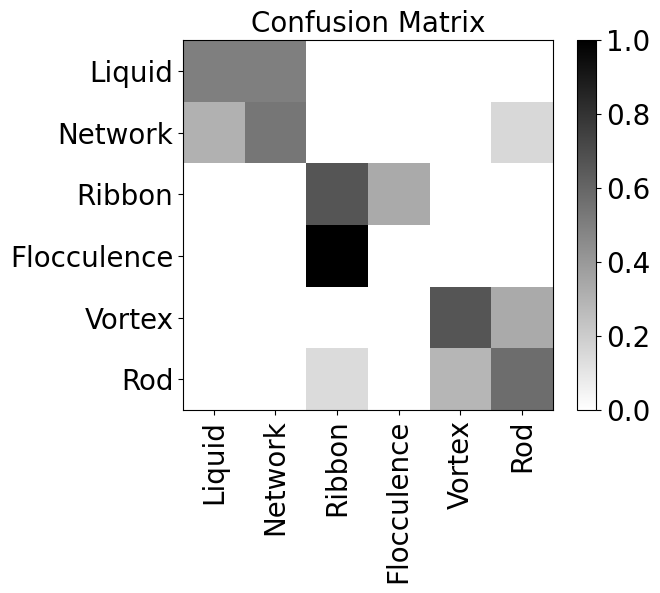

In [51]:
plot_confusion_matrix(label, pred, pattern_dict)

In [52]:
top_2 = 0
count = 0
from ignite.metrics import TopKCategoricalAccuracy
from ignite.engine import Engine
def process_function(engine, batch):
    y_pred, y = batch
    return y_pred, y

def one_hot_to_binary_output_transform(output):
    y_pred, y = output
    y = torch.argmax(y, dim=1)  # one-hot vector to label index vector
    return y_pred, y

engine = Engine(process_function)
metric = TopKCategoricalAccuracy(
    k=2, output_transform=one_hot_to_binary_output_transform)
metric.attach(engine, 'top_k_accuracy')

for i, [data, label] in enumerate(test_loader):
    data, label = data.to(torch.float32), label
    output = F.softmax(MLP_basic(data),dim=1)
    label = torch.tensor((np.eye(6)[label]))
    state = engine.run([[output, label]])
    top_2 += state.metrics['top_k_accuracy']*100
    count += 1
    print(i)
print(top_2/count)

0
83.87096774193549
